In [ ]:
# load_data.py
import pandas as pd

def load_dataset(file_path):
    """
    โหลดข้อมูลจากไฟล์และ return DataFrame
    """
    df = pd.read_excel(file_path)  # หรือเปลี่ยนเป็น read_csv ถ้าเป็น CSV
    return df

if __name__ == "__main__":
    df = load_dataset("AGB_Data.xlsx")
    print(df.head())

    NDVI  TNDVI     SR   SAVI  MSAVI2        AGB
0 -0.072  0.654  0.866 -0.108  -0.154   7.158685
1 -0.072  0.654  0.866 -0.108  -0.154  12.112405
2 -0.056  0.666  0.894 -0.084  -0.118  21.010835
3 -0.048  0.672  0.908 -0.072  -0.101  24.553987
4 -0.041  0.678  0.922 -0.061  -0.084  25.799105


In [ ]:
# เลือกคอลัมน์ที่ใช้ (ใช้ทั้งหมด ยกเว้น AGB)
# df = df[['NDVI', 'TNDVI', 'SR', 'SAVI', 'MSAVI2', 'AGB']] # ลบบรรทัดนี้ออก

# แยกตัวแปรต้นและตัวแปรตาม
X = df[['TNDVI']]
y = df['AGB']

# แบ่ง train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# แสดงขนาดข้อมูล
print(f"Train: {X_train.shape[0]} rows")
print(f"Test : {X_test.shape[0]} rows")

Train: 44 rows
Test : 11 rows


Simple Linear Regression
R²  : 0.6777
RMSE: 8.4380
MAE : 6.2916


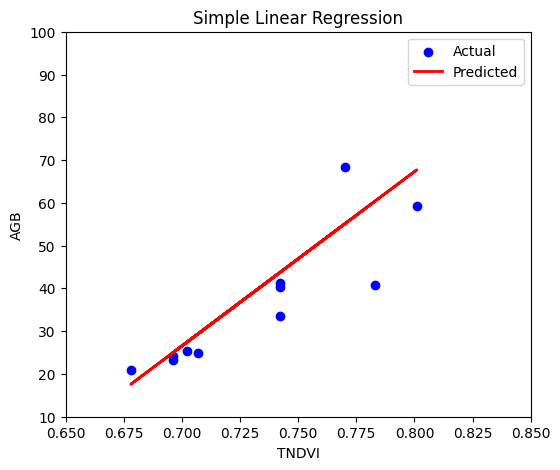

In [ ]:
# import library สำหรับโมเดลและกราฟ
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# สร้างและเทรนโมเดล
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# ทำนายค่า
y_pred = lin_reg.predict(X_test)

# แสดงค่าความแม่น
print("Simple Linear Regression")
print(f"R²  : {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAE : {mean_absolute_error(y_test, y_pred):.4f}")

# วาดกราฟ
plt.figure(figsize=(6,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('TNDVI')
plt.ylabel('AGB')
plt.title('Simple Linear Regression')
plt.xlim(0.65, 0.85)  # ช่วงแกน X เท่ากัน
plt.ylim(10, 100)     # ช่วงแกน Y เท่ากัน
plt.legend()
plt.show()

Polynomial Regression (degree 2)
R²  : 0.6628
RMSE: 8.6316
MAE : 5.5928


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


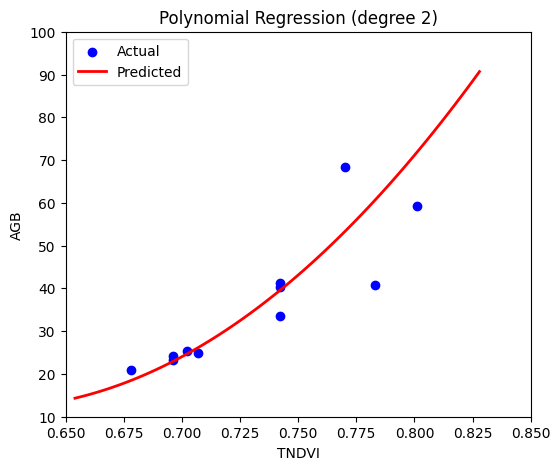

In [ ]:
# import library สำหรับ Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# สร้าง Polynomial features degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# สร้างและเทรนโมเดล
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# ทำนายค่า
y_pred_poly = poly_reg.predict(X_test_poly)

# แสดงค่าความแม่น
print("Polynomial Regression (degree 2)")
print(f"R²  : {r2_score(y_test, y_pred_poly):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly)):.4f}")
print(f"MAE : {mean_absolute_error(y_test, y_pred_poly):.4f}")

# วาดกราฟ
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_range = poly_reg.predict(poly.transform(X_range))

plt.figure(figsize=(6,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_range, y_range, color='red', linewidth=2, label='Predicted')
plt.xlabel('TNDVI')
plt.ylabel('AGB')
plt.title('Polynomial Regression (degree 2)')
plt.xlim(0.65, 0.85)  # ช่วงแกน X เท่ากัน
plt.ylim(10, 100)     # ช่วงแกน Y เท่ากัน
plt.legend()
plt.show()

Random Forest Regressor
R²  : 0.4128
RMSE: 11.3898
MAE : 7.5812


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


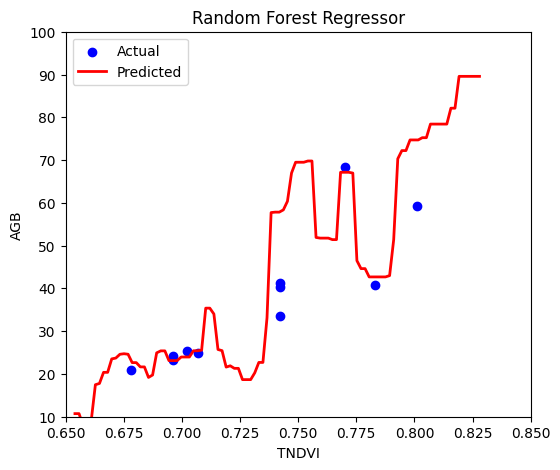

In [ ]:
# import library สำหรับ Random Forest
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# สร้างและเทรนโมเดล
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# ทำนายค่า
y_pred_rf = rf_reg.predict(X_test)

# แสดงค่าความแม่น
print("Random Forest Regressor")
print(f"R²  : {r2_score(y_test, y_pred_rf):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.4f}")
print(f"MAE : {mean_absolute_error(y_test, y_pred_rf):.4f}")

# วาดกราฟ
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_range = rf_reg.predict(X_range)

plt.figure(figsize=(6,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_range, y_range, color='red', linewidth=2, label='Predicted')
plt.xlabel('TNDVI')
plt.ylabel('AGB')
plt.title('Random Forest Regressor')
plt.xlim(0.65, 0.85)  # ช่วงแกน X เท่ากัน
plt.ylim(10, 100)     # ช่วงแกน Y เท่ากัน
plt.legend()
plt.show()

XGBoost Regressor
R²  : 0.0979
RMSE: 14.1177
MAE : 9.8989


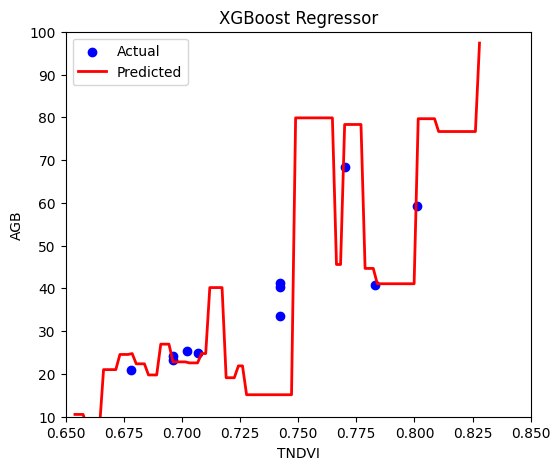

In [ ]:
# import library สำหรับ XGBoost
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# สร้างและเทรนโมเดล
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)

# ทำนายค่า
y_pred_xgb = xgb_reg.predict(X_test)

# แสดงค่าความแม่น
print("XGBoost Regressor")
print(f"R²  : {r2_score(y_test, y_pred_xgb):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.4f}")
print(f"MAE : {mean_absolute_error(y_test, y_pred_xgb):.4f}")

# วาดกราฟ
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_range = xgb_reg.predict(X_range)

plt.figure(figsize=(6,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_range, y_range, color='red', linewidth=2, label='Predicted')
plt.xlabel('TNDVI')
plt.ylabel('AGB')
plt.title('XGBoost Regressor')
plt.xlim(0.65, 0.85)  # ช่วงแกน X เท่ากัน
plt.ylim(10, 100)     # ช่วงแกน Y เท่ากัน
plt.legend()
plt.show()

Support Vector Regression (SVR)
R²  : 0.7465
RMSE: 7.4840
MAE : 4.4066


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


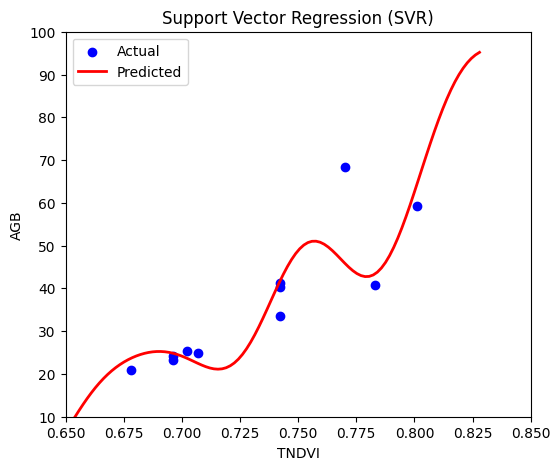

In [ ]:
# import library สำหรับ SVR
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# scale ตัวแปรเพื่อ SVR
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()

# สร้างและเทรน SVR (RBF kernel)
svr_reg = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_reg.fit(X_train_scaled, y_train_scaled)

# ทำนายค่าและแปลงกลับ
y_pred_svr_scaled = svr_reg.predict(X_test_scaled)
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1,1)).ravel()

# แสดงค่าความแม่น
print("Support Vector Regression (SVR)")
print(f"R²  : {r2_score(y_test, y_pred_svr):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_svr)):.4f}")
print(f"MAE : {mean_absolute_error(y_test, y_pred_svr):.4f}")

# วาดกราฟ
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
X_range_scaled = scaler_X.transform(X_range)
y_range_scaled = svr_reg.predict(X_range_scaled)
y_range = scaler_y.inverse_transform(y_range_scaled.reshape(-1,1)).ravel()

plt.figure(figsize=(6,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_range, y_range, color='red', linewidth=2, label='Predicted')
plt.xlabel('TNDVI')
plt.ylabel('AGB')
plt.title('Support Vector Regression (SVR)')
plt.xlim(0.65, 0.85)  # ช่วงแกน X เท่ากัน
plt.ylim(10, 100)     # ช่วงแกน Y เท่ากัน
plt.legend()
plt.show()

In [ ]:
# import library
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# เก็บผลของแต่ละโมเดล
results = {
    'Model': ['Simple Linear', 'Polynomial (deg2)', 'Random Forest', 'XGBoost', 'SVR'],
    'R2': [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_svr)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred)),
        np.sqrt(mean_squared_error(y_test, y_pred_poly)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
        np.sqrt(mean_squared_error(y_test, y_pred_svr))
    ],
    'MAE': [
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_pred_poly),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_xgb),
        mean_absolute_error(y_test, y_pred_svr)
    ]
}

# สร้าง DataFrame
results_df = pd.DataFrame(results)

# แสดงตาราง
print("Comparison of 6 Models")
print(results_df)

# ถ้าต้องการจัดเรียง R2 จากมากไปน้อย
results_df_sorted = results_df.sort_values(by='R2', ascending=False)
print("\nSorted by R² (descending)")
print(results_df_sorted)

Comparison of 6 Models
               Model        R2       RMSE       MAE
0      Simple Linear  0.677742   8.438001  6.291592
1  Polynomial (deg2)  0.662781   8.631650  5.592755
2      Random Forest  0.412841  11.389785  7.581233
3            XGBoost  0.097908  14.117668  9.898865
4                SVR  0.746494   7.483970  4.406596

Sorted by R² (descending)
               Model        R2       RMSE       MAE
4                SVR  0.746494   7.483970  4.406596
0      Simple Linear  0.677742   8.438001  6.291592
1  Polynomial (deg2)  0.662781   8.631650  5.592755
2      Random Forest  0.412841  11.389785  7.581233
3            XGBoost  0.097908  14.117668  9.898865


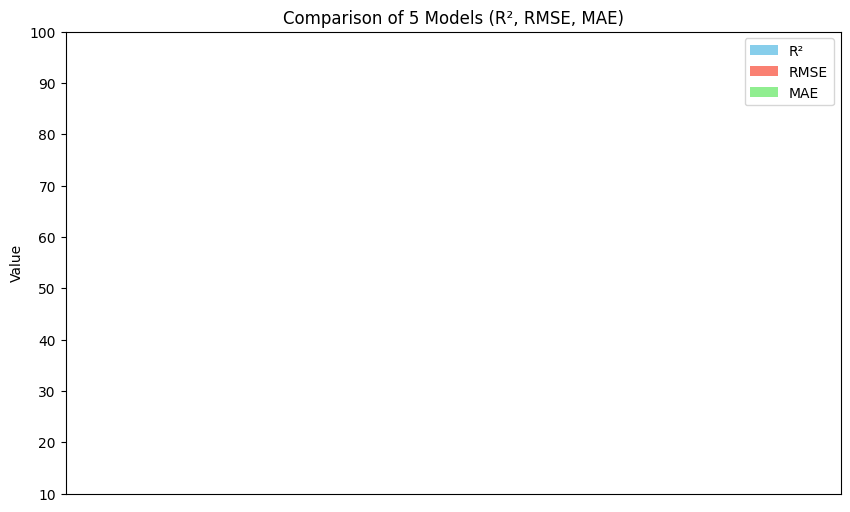

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ข้อมูล
models = ['SVR', 'Simple Linear', 'Polynomial (deg2)', 'Random Forest', 'XGBoost']
R2 = [0.746494, 0.677742, 0.662781, 0.412841, 0.097908]
RMSE = [7.483970, 8.438001, 8.631650, 11.389785, 14.117668]
MAE = [4.406596, 6.291592, 5.592755, 7.581233, 9.898865]

x = np.arange(len(models))
width = 0.25

# สร้างกราฟ bar chart
plt.figure(figsize=(10,6))

plt.bar(x - width, R2, width, label='R²', color='skyblue')
plt.bar(x, RMSE, width, label='RMSE', color='salmon')
plt.bar(x + width, MAE, width, label='MAE', color='lightgreen')

plt.xticks(x, models)
plt.ylabel('Value')
plt.title('Comparison of 5 Models (R², RMSE, MAE)')
plt.legend()
plt.xlim(0.65, 0.85)  # ช่วงแกน X เท่ากัน
plt.ylim(10, 100)     # ช่วงแกน Y เท่ากัน
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


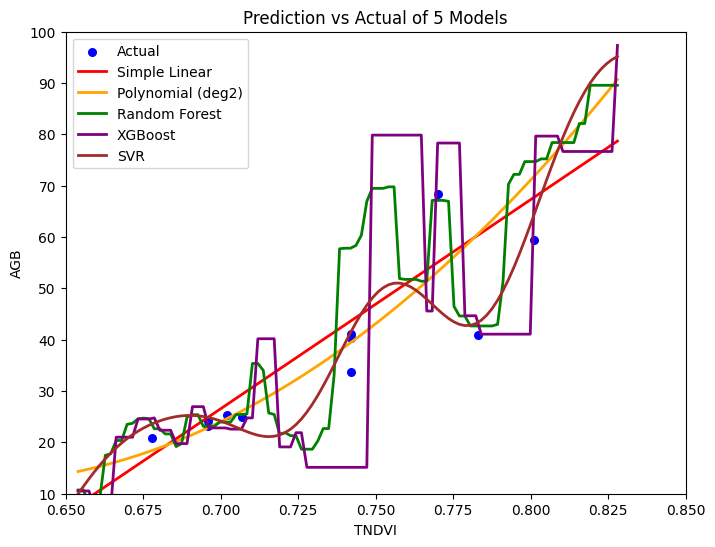

In [ ]:
plt.figure(figsize=(8,6))

# Scatter ของค่าจริง
plt.scatter(X_test, y_test, color='blue', label='Actual', s=30)

# เส้นทำนายของแต่ละโมเดล
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

# 1. Simple Linear
plt.plot(X_range, lin_reg.predict(X_range), color='red', linewidth=2, label='Simple Linear')

# 2. Polynomial (deg2)
plt.plot(X_range, poly_reg.predict(poly.transform(X_range)), color='orange', linewidth=2, label='Polynomial (deg2)')

# 3. Random Forest
plt.plot(X_range, rf_reg.predict(X_range), color='green', linewidth=2, label='Random Forest')

# 4. XGBoost
plt.plot(X_range, xgb_reg.predict(X_range), color='purple', linewidth=2, label='XGBoost')

# 5. SVR
y_range_svr = scaler_y.inverse_transform(svr_reg.predict(scaler_X.transform(X_range)).reshape(-1,1)).ravel()
plt.plot(X_range, y_range_svr, color='brown', linewidth=2, label='SVR')

# กำหนดแกนและรายละเอียด
plt.xlabel('TNDVI')
plt.ylabel('AGB')
plt.title('Prediction vs Actual of 5 Models')
plt.xlim(0.65,0.85)
plt.ylim(10,100)
plt.legend()
plt.show()

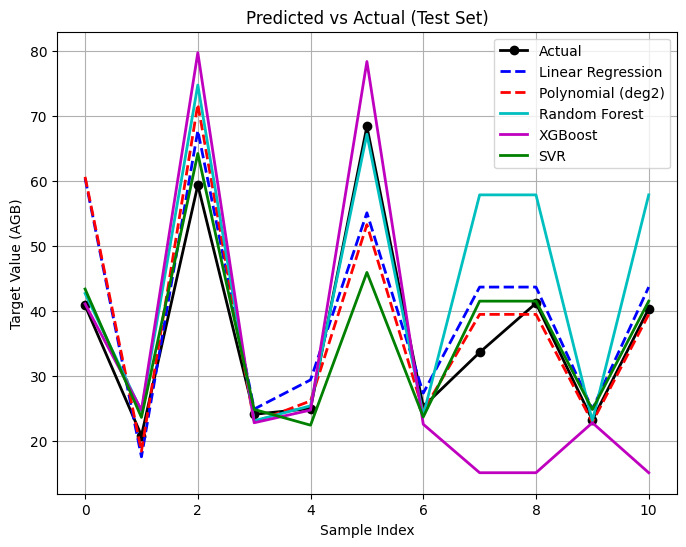

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# สมมติ X_test, y_test เป็นข้อมูลจริง
# และโมเดลแต่ละตัวมี .predict() พร้อมใช้

plt.figure(figsize=(8,6))

# Actual เป็นเส้นดำพร้อมจุด
plt.plot(range(len(y_test)), y_test, 'ko-', linewidth=2, markersize=6, label='Actual')

# โมเดลต่างๆ
plt.plot(range(len(y_test)), lin_reg.predict(X_test), 'b--', linewidth=2, label='Linear Regression')
plt.plot(range(len(y_test)), poly_reg.predict(poly.transform(X_test)), 'r--', linewidth=2, label='Polynomial (deg2)')
plt.plot(range(len(y_test)), rf_reg.predict(X_test), 'c-', linewidth=2, label='Random Forest')
plt.plot(range(len(y_test)), xgb_reg.predict(X_test), 'm-', linewidth=2, label='XGBoost')
y_svr = scaler_y.inverse_transform(svr_reg.predict(scaler_X.transform(X_test)).reshape(-1,1)).ravel()
plt.plot(range(len(y_test)), y_svr, 'g-', linewidth=2, label='SVR')

# แกนและรายละเอียด
plt.xlabel('Sample Index')
plt.ylabel('Target Value (AGB)')
plt.title('Predicted vs Actual (Test Set)')
plt.legend()
plt.grid(True)
plt.show()